<a href="https://colab.research.google.com/github/JeffersonRodrigues9/Projetos-em-Machine-Learning/blob/main/Projeto02_ML_Parte5_PROJETO_COMPLETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Neste projeto de Machine Learning, o objetivo é construir um modelo de
# classificação para identificar clientes inadimplentes em uma empresa de
# empréstimo de automóveis. Vamos seguir os seguintes passos:
#
# 1. Leitura da base de dados: Carregaremos e analisaremos os dados fornecidos
#    para entender os padrões que podem ajudar na identificação dos clientes
#    inadimplentes.
#
# 2. Criação de modelo de classificação: Utilizaremos algoritmos de Machine
#    Learning para criar um modelo capaz de classificar os clientes como
#    inadimplentes ou não.
#
# 3. Validação de modelos: Avaliaremos o desempenho dos modelos criados,
#    ajustando parâmetros e técnicas para melhorar a precisão e eficiência da
#    classificação.
#
# Este projeto pode ser útil para empresas que buscam mitigar os riscos de
# inadimplência, prevendo com maior precisão quais clientes têm mais chance de
# não honrar suas dívidas.

In [40]:
import pandas as pd

In [41]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [42]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [43]:
x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [46]:
print(f'Acurácio: {modelo.score(x,y)}')

Acurácio: 1.0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state =5)

In [49]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurária de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurária de validação: 0.848271056528177


In [50]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurária de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9206445993031359
Acurária de validação: 0.9060186394913335


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10358   121]
 [  958    44]]


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

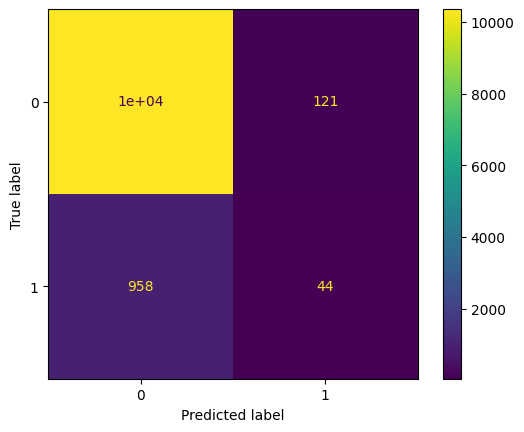

In [54]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

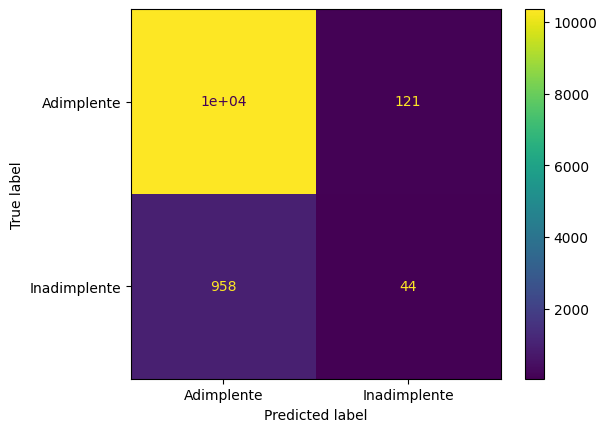

In [55]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9060186394913335


In [59]:
from sklearn.metrics import precision_score, recall_score

In [60]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.26666666666666666
Recall: 0.043912175648702596


In [61]:
from sklearn.metrics import f1_score

In [62]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07540702656383891


In [63]:
from sklearn.metrics import RocCurveDisplay

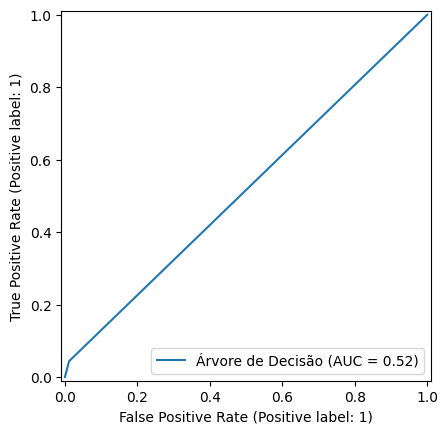

In [64]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5161826361591161


In [67]:
from sklearn.metrics import PrecisionRecallDisplay

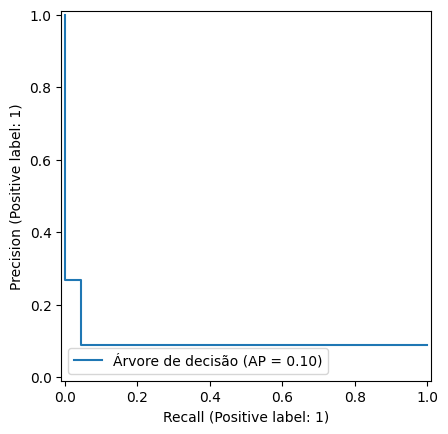

In [68]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [69]:
from sklearn.metrics import average_precision_score

In [70]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09515212237314415


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.27      0.04      0.08      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [74]:
from sklearn.model_selection import cross_validate, KFold

In [75]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [76]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.50745106, 0.45469451, 0.41006207, 0.35966372, 0.33649373]),
 'score_time': array([0.00562763, 0.00532389, 0.00591946, 0.00571871, 0.00650001]),
 'test_score': array([0.91290147, 0.90777439, 0.90777439, 0.91398084, 0.89982578])}

In [80]:
cv_resultados['test_score']

array([0.91290147, 0.90777439, 0.90777439, 0.91398084, 0.89982578])

In [81]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8984235838122936, 0.9184791643815311]


In [82]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [83]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [84]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.7782445 , 0.89814711, 0.66929412, 0.43818355, 0.33583403]),
 'score_time': array([0.02066851, 0.02968264, 0.00911736, 0.00949621, 0.01095152]),
 'test_score': array([0.02642008, 0.01980198, 0.02091021, 0.0156658 , 0.02427746])}

In [85]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.013977122551533508, 0.028853086069424473]


In [86]:
dados['inadimplente'].value_counts(normalize = True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [87]:
from sklearn.model_selection import StratifiedKFold

In [88]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [89]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.02061639006037445, 0.03525641232816107]


In [91]:
from imblearn.over_sampling import SMOTE

In [93]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [94]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


In [95]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [96]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.706863765261839, 0.7416467399011901]


In [97]:
from imblearn.pipeline import Pipeline as imbpipeline

In [98]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [100]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [101]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.21295911304344559, 0.3123599239458539]


In [102]:
from imblearn.under_sampling import NearMiss

In [103]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

In [104]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [105]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6185995155071032, 0.7073969788998257]


In [106]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [107]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [108]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



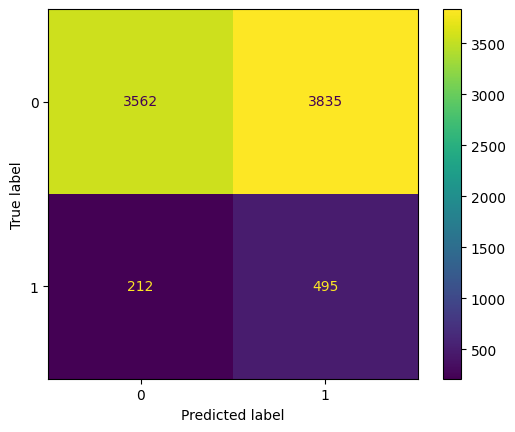

In [109]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

In [111]:
# # Este projeto tem como objetivo prever a adesão de clientes a uma campanha de marketing de um banco utilizando Machine Learning.
# Utilizamos a biblioteca Scikit-Learn para criar e avaliar modelos de classificação baseados em dados de clientes.

# Passos realizados:
# 1. Leitura e análise dos dados: Carregamos o dataset e realizamos análise exploratória (EDA) para entender padrões nas variáveis.
# 2. Pré-processamento: Aplicamos One-Hot Encoding para variáveis categóricas e LabelEncoder para a variável alvo, preparando os dados para modelagem.
# 3. Modelagem: Testamos três modelos - DummyClassifier, Árvore de Decisão e KNN. O modelo de Árvore de Decisão obteve o melhor desempenho, com 71,6% de acurácia nos dados de teste.
# 4. Avaliação do modelo: Analisamos as métricas de desempenho (precisão, recall, F1-score) e visualizamos a árvore de decisão.
# 5. Armazenamento do modelo: Salvamos o modelo de Árvore de Decisão e o OneHotEncoder em arquivos .pkl para facilitar a implementação em produção.
# 6. Conclusão: O sistema foi desenvolvido para gerar previsões sobre a adesão de clientes, pronto para ser integrado a sistemas reais do banco.

# Esse modelo ajudará o banco a otimizar suas estratégias de marketing, direcionando melhor os recursos para clientes com maior probabilidade de investir na campanha.